# Assignment: Working with Data

>Using the data below, answer the following questions:

>1) Which entities (top 5) had the largest population density in 2020?
>2) Which entities have more water area than land area?
>3) Which entities increased in population the most in the last 10 years?
>4) What state bird accounts for the largest population as of 2020? Land area?
>5) How many entities' largest city is their capital city?
>6) Which city has the largest percent drop from their largest city to their 5th largest? 100*(1st largest - 5th largest)/(1st largest)

In [66]:
import pandas as pd
import numpy as np

In [91]:
facts = pd.read_csv('../data/state_facts.tsv',delimiter="\t")
facts.head(57)

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,City_1,city_1_pop,City_2,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop
0,Alabama,135767,131171,4597,5024279.0,4779736,7,Yellowhammer (Northern flicker),Camellia,Audemus jura nostra defendere,...,Birmingham,208928,Huntsville,204189.0,Montgomery,198956.0,Mobile,189572.0,Tuscaloosa,101113.0
1,Alaska,1723337,1477953,245384,733391.0,710231,1,Willow ptarmigan,Forget-me-not,North to the Future,...,Anchorage,291538,Juneau,32197.0,Fairbanks,31516.0,Wasilla,10529.0,Sitka,8647.0
2,American Samoa,1505,198,1307,49437.0,55519,1*,None,Paogo (Ulafala),"Samoa, Muamua Le Atua",...,Tafuna,7945,Nu'uuli,3955.0,Pago Pago,3656.0,'Ili'ili,3195.0,Pava'ia'i,2450.0
3,Arizona,295234,294207,1026,7151502.0,6392017,9,Cactus wren,Saguaro cactus blossom,Ditat Deus,...,Phoenix,1660272,Tucson,545975.0,Mesa,508958.0,Chandler,257165.0,Scottsdale,255310.0
4,Arkansas,137732,134771,2961,3011524.0,2915918,4,Northern mockingbird,Apple blossom,Regnat populus,...,Little Rock,197881,Fort Smith,87845.0,Fayetteville,86751.0,Springdale,81029.0,Jonesboro,76990.0
5,California,423967,403466,20501,39538223.0,37253956,52,California quail,California poppy,Eureka,...,Los Angeles,3997984,San Diego,1425976.0,San Jose,1030119.0,San Francisco,884198.0,Fresno,530093.0
6,Colorado,269601,268431,1170,5773714.0,5029196,8,Lark bunting,Rocky Mountain columbine,Nil sine numine,...,Denver,719238,Colorado Springs,483829.0,Aurora,374114.0,Fort Collins,167830.0,Lakewood,156798.0
7,Connecticut,14357,12542,1816,3605944.0,3574097,5,American robin,Mountain laurel,Qui transtulit sustinet,...,Bridgeport,144900,New Haven,130418.0,Stamford,129775.0,Hartford,122587.0,Waterbury,108093.0
8,Delaware,6446,5047,1399,989948.0,897934,1,Delaware Blue Hen,Peach blossom,Liberty and independence,...,Wilmington,70635,Dover,38079.0,Newark,33673.0,Middletown,22582.0,Smyrna,11580.0
9,District of Columbia,177,158,19,689545.0,601723,1*,Wood thrush,American Beauty Rose,Justitia Omnibus,...,"Washington, D.C.",702455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
#1. 
facts['Pop_density']= facts['Pop_2020']/facts["Area_land"]
facts[['State','Pop_density']].sort_values(by='Pop_density', ascending=False).head()

,State,Pop_density
9,District of Columbia,4364.208861
32,New Jersey,487.688035
43,Rhode Island,409.775579
42,Puerto Rico,370.531574
23,Massachusetts,347.981239


In [69]:
#2: Northern Mariana Islands, US Virgin Islands, American Samoa, and Guam. all negative values have more water than land
facts['Water_vs_Land']= facts['Area_land']-facts["Area_water"]
facts[['State','Water_vs_Land']].sort_values(by='Water_vs_Land', ascending=True).head()

,State,Water_vs_Land
37,Northern Mariana Islands,-4172
48,United States Virgin Islands,-1202
2,American Samoa,-1109
12,Guam,-392
9,District of Columbia,139


In [70]:
#3: Texas, Florida, California, Georgia, Washington
facts['Pop_change']= facts['Pop_2020']-facts['Pop_2010']
facts[['State','Pop_change']].sort_values(by='Pop_change', ascending=False).head()

,State,Pop_change
47,Texas,3999944.0
10,Florida,2736877.0
5,California,2284267.0
11,Georgia,1024255.0
52,Washington,980741.0


In [71]:
#4:Population: Northern Mockingbird; Land Area: Willow Ptarmigan
facts[['State','Pop_2020', 'State_bird']].sort_values(by='State_bird', ascending=True).head()
State_bird_pop = facts.groupby(["State_bird"]).Pop_2020.sum().reset_index()
print(State_bird_pop.sort_values(by = 'Pop_2020', ascending = False).head())
State_bird_area = facts.groupby(['State_bird']).Area_land.sum().reset_index()
State_bird_area.sort_values(by = 'Area_land', ascending = False).head()

               State_bird    Pop_2020
25  Northern mockingbird   63567335.0
24     Northern cardinal   56767817.0
8       California quail   39538223.0
13      Eastern bluebird   26356162.0
0         American robin   19576993.0


,State_bird,Area_land
34,Willow ptarmigan,1477953
32,Western meadowlark,1215009
25,Northern mockingbird,1178574
24,Northern cardinal,735138
21,Mountain bluebird,498377


In [72]:
facts.columns

Index(['State', 'Area_tot', 'Area_land', 'Area_water', 'Pop_2020', 'Pop_2010',
       'Rep_seats', 'State_bird', 'State_flower', 'State_motto', 'Motto_trans',
       'USPS_code', 'GDP_2020', 'GDP_2019', 'Capital', 'Capital_pop', 'City_1',
       'city_1_pop', 'City_2', 'city_2_pop', 'City_3', 'city_3_pop', 'City_4',
       'city_4_pop', 'City_5', 'city_5_pop', 'Pop_density', 'Water_vs_Land',
       'Pop_change'],
      dtype='object')

In [73]:
#5:Data wasn't clean. so results weren't accurate in table. Actual value is 21.
facts['Capital_largest'] = np.where( facts['Capital'] == facts['City_1'] , '1', '0')
facts[['State','Capital','City_1','Capital_largest']].sort_values(by='Capital_largest', ascending=False)

,State,Capital,City_1,Capital_largest
55,Wyoming,Cheyenne,Cheyenne,1
11,Georgia,Atlanta,Atlanta,1
38,Ohio,Columbus,Columbus,1
39,Oklahoma,Oklahoma City,Oklahoma City,1
26,Mississippi,Jackson,Jackson,1
23,Massachusetts,Boston,Boston,1
43,Rhode Island,Providence,Providence,1
46,Tennessee,Nashville,Nashville,1
17,Iowa,Des Moines,Des Moines,1
14,Idaho,Boise,Boise,1


>Using the "state_dates.tsv" data, answer the remaining questions. You will need to merge the two data sets together:

>7) Of the states that joined the United States before 1790, what is the most common state flower?
>8) Which has the larger population density, the most dense US Territory or the least dense state?
>9) Make a graph that plots the populations of the largest city in each entity in the order in which they joined the US. Make the bars black
>10) Make two additional graphs like the one above but one for land area (green bars) and one for water area (blue bars)

Hint: `pd.read_csv('../data/state_dates.tsv',delimiter="\t")`

Hint: You likely want to convert the Date column to datetime. You might have to correct errors in the data as well.

Hint: `states['Date']<pd.datetime(1790,1,1)`

Hint: `pd.merge(****,****,left_on='USPS_code',right_on='Abbreviation',how='outer')`

In [74]:
# Sample code to help with the plots

import matplotlib as plt
%config InlineBackend.figure_format ='retina' #This makes your plot clearer


#plot = *your df by date*[[*column*,'Abbreviation']].plot(kind='bar',figsize=(10,4))
#plot.set_xticklabels(*your df by date*['Abbreviation']);

In [75]:
statedates = pd.read_csv('../data/state_dates.tsv',delimiter="\t")
statedates.head()

,Name,Date,Status,Abbreviation
0,Alabama,"December 14, 1819",State,AL
1,Alaska,"January 3, 1959",State,AK
2,American Samoa,"April 17, 1900",Territory,AS
3,Arizona,"February 14, 1912",State,AZ
4,Arkansas,"June 15, 1836",State,AR


In [76]:
statedates['Date'] = pd.to_datetime(statedates['Date'])
statedates.head()

,Name,Date,Status,Abbreviation
0,Alabama,1819-12-14,State,AL
1,Alaska,1959-01-03,State,AK
2,American Samoa,1900-04-17,Territory,AS
3,Arizona,1912-02-14,State,AZ
4,Arkansas,1836-06-15,State,AR


In [77]:
merged = pd.merge(facts,statedates, left_on='USPS_code',right_on='Abbreviation',how='outer')
merged[['State','State_flower','Date']].sort_values(by='State_flower', ascending=True).head()

,State,State_flower,Date
9,District of Columbia,American Beauty Rose,1871-02-21
51,Virginia,American dogwood,1788-06-25
24,Michigan,Apple blossom,1837-01-26
4,Arkansas,Apple blossom,1836-06-15
28,Montana,Bitterroot,1889-11-08


In [78]:
#7: Mountain Laurel is the most common, appearing twice.
merged[['State','State_flower','Date']].loc[(merged['Date'] < '1790')].sort_values(by='State_flower', ascending=True)

,State,State_flower,Date
51,Virginia,American dogwood,1788-06-25
22,Maryland,Black-eyed susan,1788-04-28
11,Georgia,Cherokee rose,1788-01-02
35,North Carolina,Flowering dogwood,1789-11-21
23,Massachusetts,Mayflower,1788-02-06
7,Connecticut,Mountain laurel,1788-01-09
41,Pennsylvania,Mountain laurel,1787-12-12
8,Delaware,Peach blossom,1787-12-07
31,New Hampshire,Purple lilac,1788-06-21
34,New York,Rose,1788-07-26


In [79]:
#8: The most dense territory, Puerto Rico, is more dense than the least dense state.

merged[['State','Pop_density','Rep_seats']].sort_values(by='Pop_density', ascending=False).head()

,State,Pop_density,Rep_seats
9,District of Columbia,4364.208861,1*
32,New Jersey,487.688035,12
43,Rhode Island,409.775579,2
42,Puerto Rico,370.531574,1*
23,Massachusetts,347.981239,9


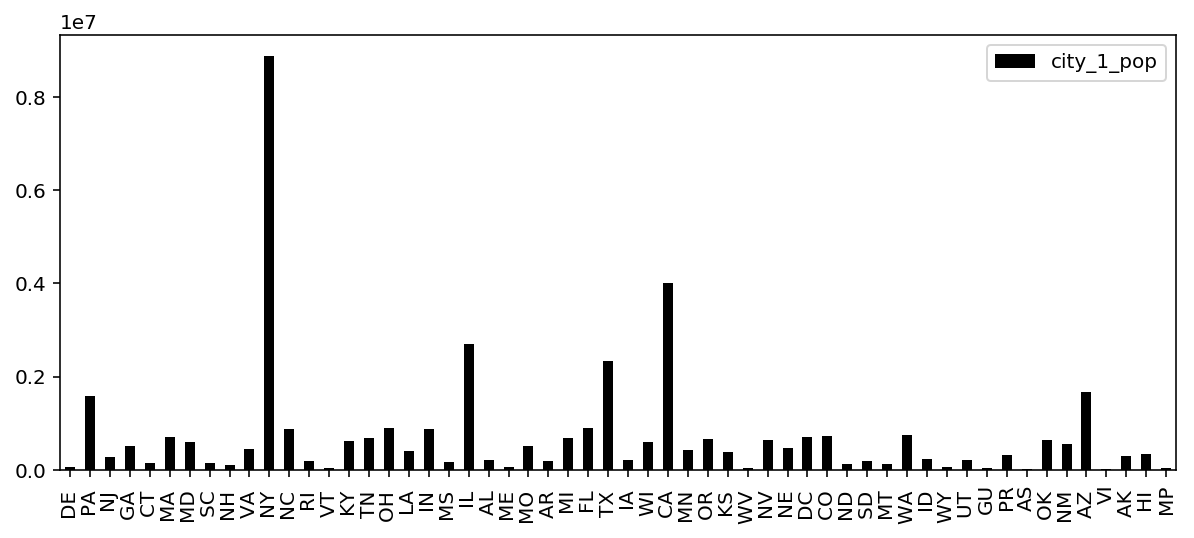

In [95]:
#9:
num_9 = merged[['Abbreviation','City_1','city_1_pop','Date']].sort_values(by='Date', ascending=True)
plot = num_9[['city_1_pop','Abbreviation']].plot(kind='bar',figsize=(10,4), color ="black")
plot.set_xticklabels(num_9['Abbreviation']);

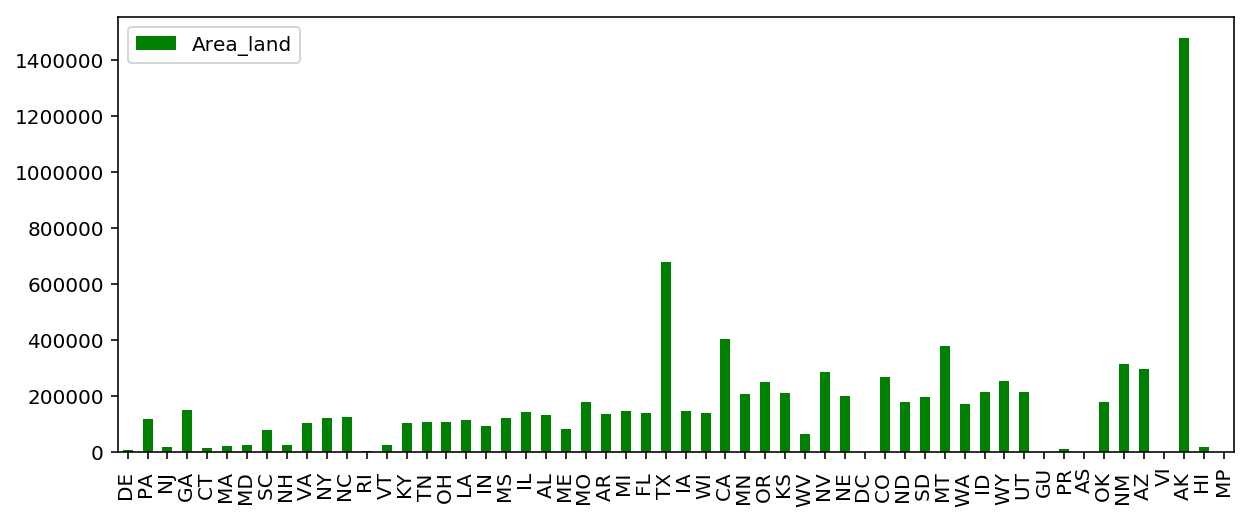

In [103]:
#10:
num_10 = merged[['Abbreviation','Area_land','Area_water','Date']].sort_values(by='Date', ascending=True)
plot2 = num_10[['Area_land','Abbreviation']].plot(kind='bar',figsize=(10,4), color ="green" )
plot2.set_xticklabels(num_9['Abbreviation']);

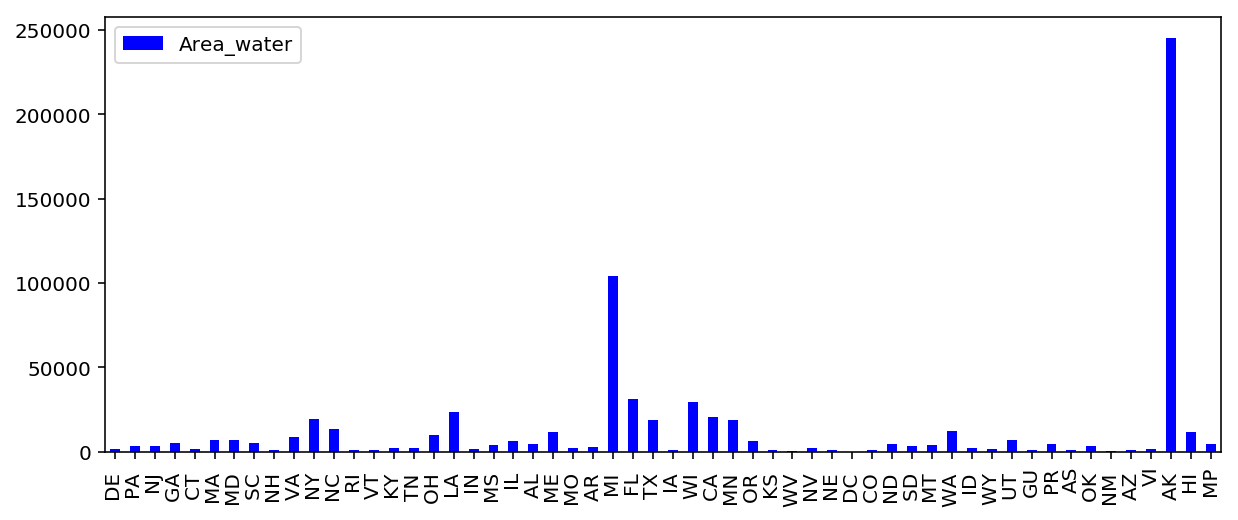

In [104]:
num_10 = merged[['Abbreviation','Area_land','Area_water','Date']].sort_values(by='Date', ascending=True)
plot2 = num_10[['Area_water','Abbreviation']].plot(kind='bar',figsize=(10,4), color ="blue" )
plot2.set_xticklabels(num_9['Abbreviation']);